In [ ]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

In [2]:
import cv2 as cv
import cv2.xfeatures2d
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

cv2.__version__

'3.4.2'

In [3]:
surf = cv2.xfeatures2d.SURF_create(1000)
print('surf descriptor size: %d' % surf.descriptorSize())

surf descriptor size: 64


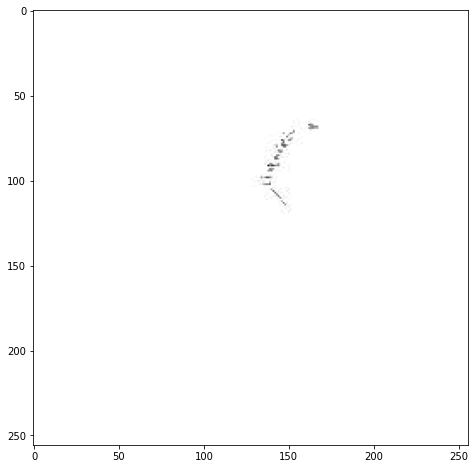

In [22]:
img = cv.imread(str("NY00559020_01.jpeg"), cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(80,8))
plt.imshow(img, cmap="gray")

In [13]:
kp, des = surf.detectAndCompute(img, None)
# print('des.shape: %s' % str(des.shape))

v_hist = des.shape[0]
# print('v_hist: %d' % v_hist)

vetor_aux = np.mean(des, axis=0)
mean = vetor_aux[0:vetor_aux.shape[0]]
# print(mean, mean.shape, mean.dtype, type(mean))

vetor_aux = np.std(des, axis=0)
desv_pad = vetor_aux[0:vetor_aux.shape[0]]
# print(desv_pad, desv_pad.shape, desv_pad.dtype, type(desv_pad))

vetor_aux = scipy.stats.kurtosis(des, axis=0)
kurtosis = vetor_aux[0:vetor_aux.shape[0]]
# print(kurtosis, kurtosis.shape, kurtosis.dtype, type(kurtosis))

vetor_aux = scipy.stats.skew(des, axis=0)
skew = vetor_aux[0:vetor_aux.shape[0]]
# print(skew, skew.shape, skew.dtype, type(skew))

# 47 eh a label
features = np.concatenate((np.array([v_hist], dtype=int), mean, desv_pad, kurtosis, skew, np.array([47], dtype=int)))

In [19]:
import pandas as pd
pd.DataFrame(np.array(features)).transpose()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,1.0,0.000197,-0.000354,0.000289,0.000354,0.000056,-0.000611,0.000611,0.000611,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0
